In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pickle as pkl
from descartes import PolygonPatch

import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup
import urllib.request
import urllib3
import json
from pandas.io.json import json_normalize
import numpy as np

In [2]:
crs = {'init': 'epsg:4326'}
turl = 'https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/City_Boundary/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
bdry = gpd.read_file(turl)
bdry.dtypes

OBJECTID               int64
CityName              object
Shape_STArea__       float64
Shape_STLength__     float64
Shape__Area          float64
Shape__Length        float64
geometry            geometry
dtype: object

In [3]:
def buffer_mi(df, miles):
    """takes geopandas dataframe and returns a buffer of miles from that point/polygon
    Args:
        df (geopandas dataframe) - geopandas dataframe to convert
        mile - number of miles that buffer is from points in geometry  
    Returns:
        convertedDF - new geopandas dataframe that has a polygon that is m miles buffer from original geometry
    """
    #Getting mile buffer for the outside of Tempe
    convertedDF = df.to_crs({'init': 'epsg:3174'})
    
    #converting from miles to meters
    buffer_length_in_meters = (miles * 1000) * 1.60934
    convertedDF['geometry'] = convertedDF.geometry.buffer(buffer_length_in_meters)

    convertedDF = convertedDF.to_crs({'init': 'epsg:4326'})
    
    convertedDF.reset_index(inplace=True)
    convertedDF.drop(['index'], axis=1, inplace=True)
    return(convertedDF)

In [4]:
bndryConvertedB = buffer_mi(bdry, 2)

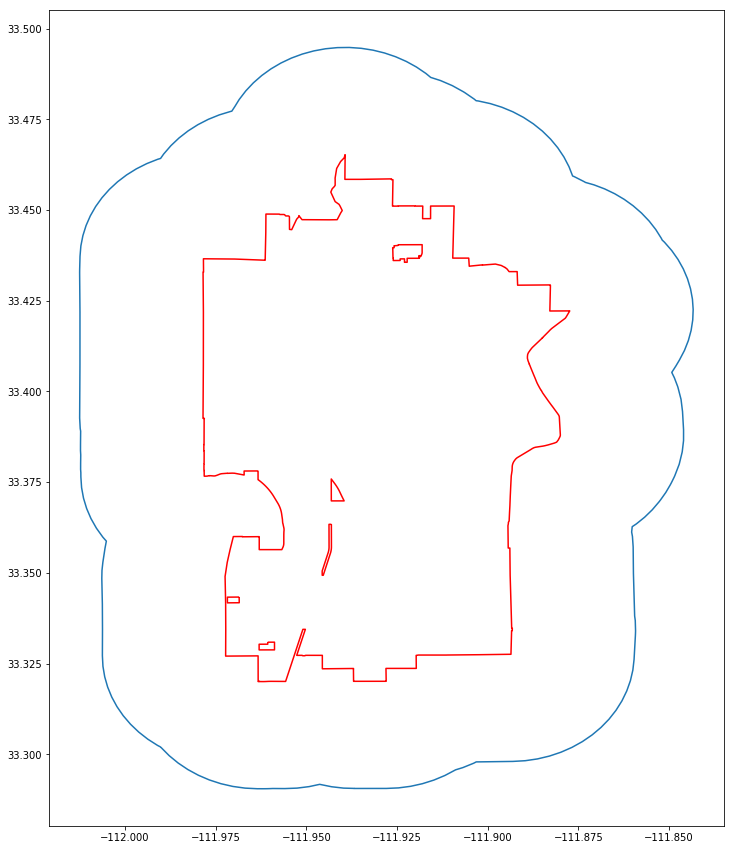

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
bndryConvertedB.boundary.plot(ax=ax)
bdry.boundary.plot(ax=ax, color='red')

In [5]:
#Pulling Tempe census data from feature layer
tempe = gpd.read_file("https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Map/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=")
tempeC = gpd.read_file("https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Map/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=")

tempeC['geometry'] = tempeC.centroid
tempeCentroidConvertedB = buffer_mi(tempeC, 2)
tempeCentroidConvertedB.head()

,OBJECTID,TempeTracts_STATEFP,TempeTracts_COUNTYFP,TempeTracts_TRACTCE,TempeTracts_GEOID,TempeTracts_NAME,TempeTracts_NAMELSAD,TempeTracts_MTFCC,TempeTracts_FUNCSTAT,TempeTracts_ALAND,...,pdb2018trv4_us_csv_pct_Vacants_,pdb2018trv4_us_csv_pct_Deletes_,pdb2018trv4_us_csv_pct_Census_U,pdb2018trv4_us_csv_pct_Mailback,pdb2018trv4_us_csv_pct_FRST_FRM,pdb2018trv4_us_csv_pct_RPLCMNT_,pdb2018trv4_us_csv_pct_BILQ_Mai,Shape__Area,Shape__Length,geometry
0,1,04,013,318800,04013318800,3188,Census Tract 3188,G5020,S,2569382,...,2.84,0,21.21,75.95,40.84,8.94,NaN,2.770706e+07,21462.867389,"POLYGON ((-111.92048 33.43902, -111.91951 33.4..."
1,2,04,013,319101,04013319101,3191.01,Census Tract 3191.01,G5020,S,330646,...,1.94,0,24.12,73.94,32.04,8.81,NaN,3.558325e+06,8618.283373,"POLYGON ((-111.89002 33.42655, -111.88906 33.4..."
2,3,04,013,318900,04013318900,3189,Census Tract 3189,G5020,S,2589083,...,3.04,0,9.56,87.41,58.33,6.86,NaN,2.786309e+07,21120.878745,"POLYGON ((-111.92013 33.42456, -111.91917 33.4..."
3,4,04,013,319000,04013319000,3190,Census Tract 3190,G5020,S,2588739,...,14.36,0,9.11,76.53,49.79,5.07,NaN,2.785941e+07,21103.097728,"POLYGON ((-111.90287 33.42460, -111.90191 33.4..."
4,5,04,013,319403,04013319403,3194.03,Census Tract 3194.03,G5020,S,2657428,...,5.68,0,4.26,90.06,66.37,0.00,NaN,2.869570e+07,21428.155647,"POLYGON ((-111.86816 33.41012, -111.86720 33.4..."


Text(0.5, 1.0, 'Tempe, AZ Census Tracts and 2 Mile City Buffer')

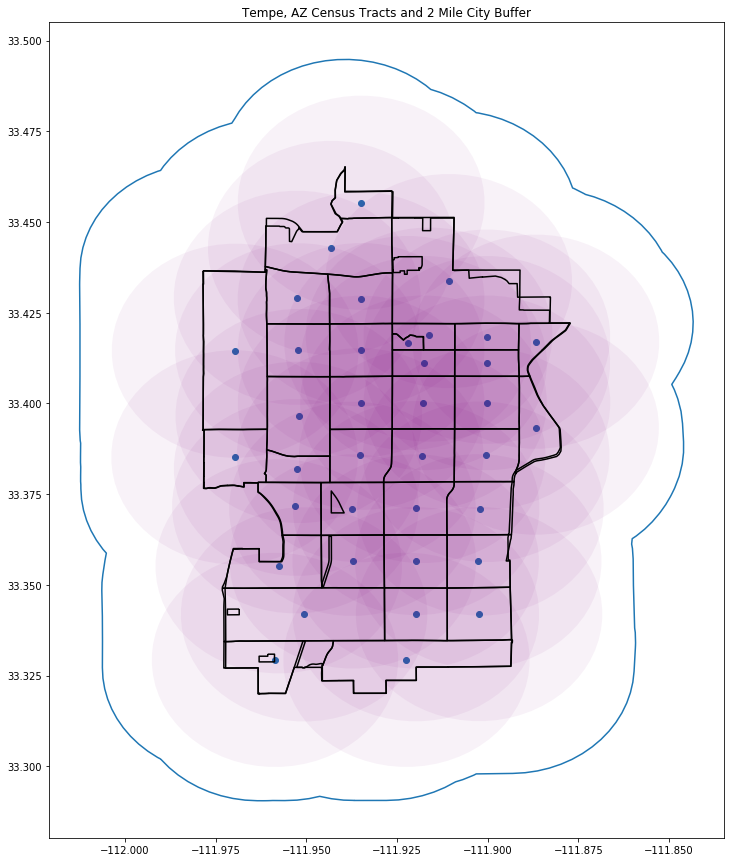

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
bndryConvertedB.boundary.plot(ax=ax)

tempe.boundary.plot(ax=ax, color='black')
tempe.centroid.plot(ax=ax)
bdry.boundary.plot(ax=ax, color='black')
#tempe.centroid.plot(ax=ax, color='red')
#tempeCentroidConvertedB.plot(ax=ax, color='purple',alpha=0.05)
tempeCentroidConvertedB.plot(ax=ax, color='purple',alpha='0.05')
plt.title("Tempe, AZ Census Tracts and 2 Mile City Buffer")
#plt.savefig('TempeCensus2Mile.png')

# Medical Facilities in Maricopa County

In [7]:
def create_geo_df_mf(url, layer):
    """takes url and returns geopandas dataframe used for the Medical facilities.
    Args:
        url - queried from ArcGIS
        layer - name of the feature layer data was pulled from
    Returns:
        geo_df - new geopandas dataframe from that url
    """
    resp = requests.get(url)
    data_raw = resp.json()

    medF_data = pd.io.json.json_normalize(data_raw['features'])
    desired_cols = ['attributes.Name','attributes.TYPE',
                    'attributes.SUBTYPE','attributes.Icon_Category',
                   'attributes.Capacity','attributes.P_Address','attributes.P_city','attributes.P_county',
                   'attributes.P_zip','attributes.N_LAT',
                   'attributes.N_LON']

    medF_df = medF_data[desired_cols]

    medF_df.columns =['Name','Type','Subtype','Category','Capacity','Address','City','County',
                    'Zip','Lat','Lon']
    medF_df['Layer'] = layer
    
    crs = {'init': 'epsg:4326'}
    tempe_med = pd.DataFrame(medF_df)

    geometry = [Point(xy) for xy in zip(tempe_med['Lon'],tempe_med['Lat'])]

    geo_df = gpd.GeoDataFrame(tempe_med, crs = crs, geometry = geometry)
    
    return(geo_df)

In [8]:
def facility_within_tempebuffer(geo_df, tempebuffer):
    """takes geopandas dataframe and returns the points that are within the Tempe buffer
    Args:
        geo_df (geopandas dataframe) - geopandas dataframe to pull points from
        tempebuffer - geopandas dataframe made of the Tempe city mile buffer
    Returns:
        df_mi - new geopandas dataframe that the points within the Tempe buffer
    """
    df_mi = pd.DataFrame()
    for i in range(len(tempebuffer)):
        df = geo_df[geo_df.within(tempebuffer.loc[i,'geometry'])]
        df_mi = df_mi.append(df)
    df_mi.reset_index(inplace=True)
    df_mi.drop(['index'], axis=1, inplace=True)
    return(df_mi)

### Hospitals

In [9]:
url ='https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/0/query?where=N_COUNTY+%3D+%27MARICOPA+COUNTY%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
geo_hm = create_geo_df_mf(url, 'Hospital')
geo_hm

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,ST JOSEPH'S HOSPITAL AND MEDICAL CENTER,HOSPITAL,TRANSPLANT HOSPITAL,HOSPITAL,0,"350 WEST THOMAS ROAD, SUITE #500",PHOENIX,MARICOPA,85013,33.480432,-112.079297,Hospital,POINT (-112.07930 33.48043)
1,PHOENIX CHILDRENS HOSPITAL,HOSPITAL,TRANSPLANT HOSPITAL,HOSPITAL,0,1919 EAST THOMAS ROAD,PHOENIX,MARICOPA,85016,33.480082,-112.041025,Hospital,POINT (-112.04103 33.48008)
2,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF EA...,HOSPITAL,REHABILITATION,HOSPITAL,60,5652 EAST BASELINE ROAD,MESA,MARICOPA,85206,33.379473,-111.710331,Hospital,POINT (-111.71033 33.37947)
3,MAYO CLINIC HOSPITAL,HOSPITAL,TRANSPLANT HOSPITAL,HOSPITAL,0,5777 EAST MAYO BOULEVARD,PHOENIX,MARICOPA,85054,33.663173,-111.955677,Hospital,POINT (-111.95568 33.66317)
4,ARIZONA SPECIALTY HOSPITAL,HOSPITAL,SHORT TERM,HOSPITAL,24,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,MARICOPA,85224,33.334700,-111.891218,Hospital,POINT (-111.89122 33.33470)
5,US AIR FORCE HOSP,HOSPITAL,NON-PARTICIPATING HOSPITALS,HOSPITAL,0,WILLIAMS AFB,CHANDLER,MARICOPA,85224,33.300000,-111.680000,Hospital,POINT (-111.68000 33.30000)
6,BANNER GOOD SAMARITAN MEDICAL CENTER,HOSPITAL,TRANSPLANT HOSPITAL,HOSPITAL,0,"1300 NORTH 12TH STREET, SUITE 404",PHOENIX,MARICOPA,85006,33.462725,-112.056562,Hospital,POINT (-112.05656 33.46272)
7,"ST. LUKE'S BEHAVIORAL HOSPITAL, LP",HOSPITAL,PSYCHIATRIC,HOSPITAL,127,1800 EAST VAN BUREN,PHOENIX,MARICOPA,85006,33.451573,-112.042601,Hospital,POINT (-112.04260 33.45157)
8,BANNER DESERT MEDICAL CENTER,HOSPITAL,SHORT TERM,HOSPITAL,615,1400 SOUTH DOBSON ROAD,MESA,MARICOPA,85202,33.390773,-111.874786,Hospital,POINT (-111.87479 33.39077)
9,ARIZONA STATE FORENSIC HOSPITAL,HOSPITAL,PSYCHIATRIC,HOSPITAL,143,501 NORTH 24TH STREET,PHOENIX,MARICOPA,85008,33.454182,-112.030011,Hospital,POINT (-112.03001 33.45418)


In [10]:
hospitals_2mi = facility_within_tempebuffer(geo_hm, bndryConvertedB)
hospitals_2mi


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,ARIZONA SPECIALTY HOSPITAL,HOSPITAL,SHORT TERM,HOSPITAL,24,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,MARICOPA,85224,33.334700,-111.891218,Hospital,POINT (-111.89122 33.33470)
1,BANNER DESERT MEDICAL CENTER,HOSPITAL,SHORT TERM,HOSPITAL,615,1400 SOUTH DOBSON ROAD,MESA,MARICOPA,85202,33.390773,-111.874786,Hospital,POINT (-111.87479 33.39077)
2,SCOTTSDALE OSBORN MEDICAL CENTER,HOSPITAL,SHORT TERM,HOSPITAL,341,7400 EAST OSBORN ROAD,SCOTTSDALE,MARICOPA,85251,33.487776,-111.922888,Hospital,POINT (-111.92289 33.48778)
3,BANNER BEHAVIORAL HEALTH HOSPITAL,HOSPITAL,PSYCHIATRIC,HOSPITAL,156,7575 EAST EARLL DRIVE,SCOTTSDALE,MARICOPA,85251,33.483854,-111.918339,Hospital,POINT (-111.91834 33.48385)
4,O.A.S.I.S. HOSPITAL,HOSPITAL,SHORT TERM,HOSPITAL,64,750 NORTH 40TH STREET,PHOENIX,MARICOPA,85008,33.456559,-111.995377,Hospital,POINT (-111.99538 33.45656)
5,"TEMPE ST LUKE'S HOSPITAL, A CAMPUS OF ST LUKE'...",HOSPITAL,SHORT TERM,HOSPITAL,74,1500 SOUTH MILL AVENUE,TEMPE,MARICOPA,85281,33.412378,-111.940084,Hospital,POINT (-111.94008 33.41238)
6,AURORA BEHAVIORAL HEALTHCARE-TEMPE,HOSPITAL,PSYCHIATRIC,HOSPITAL,138,6350 SOUTH MAPLE AVENUE,TEMPE,MARICOPA,85283,33.364115,-111.938600,Hospital,POINT (-111.93860 33.36411)
7,GREENBAUM SPECIALTY SURGICAL HOSPITAL,HOSPITAL,SHORT TERM,HOSPITAL,26,3535 NORTH SCOTTSDALE ROAD,SCOTTSDALE,MARICOPA,85251,33.489968,-111.925891,Hospital,POINT (-111.92589 33.48997)


In [11]:
hospitals_child = hospitals_2mi[hospitals_2mi.Name.str.contains("CHILDRENS")]
hospitals_2mi = hospitals_2mi[~hospitals_2mi.Name.str.contains("CHILDRENS")]
print(len(hospitals_child))
#Making two separate dataframes for hospitals_gen (includes all short term and regular hospitals) 
#and hospitals_ment (only psychiatric hospitals)
hospitals_gen = hospitals_2mi[hospitals_2mi['Subtype']!='PSYCHIATRIC']
print(hospitals_gen.head())
hospitals_ment = hospitals_2mi[hospitals_2mi['Subtype']=='PSYCHIATRIC']
print(len(hospitals_ment))


0
                                                Name      Type     Subtype  \
0                         ARIZONA SPECIALTY HOSPITAL  HOSPITAL  SHORT TERM   
1                       BANNER DESERT MEDICAL CENTER  HOSPITAL  SHORT TERM   
2                   SCOTTSDALE OSBORN MEDICAL CENTER  HOSPITAL  SHORT TERM   
4                                O.A.S.I.S. HOSPITAL  HOSPITAL  SHORT TERM   
5  TEMPE ST LUKE'S HOSPITAL, A CAMPUS OF ST LUKE'...  HOSPITAL  SHORT TERM   

   Category  Capacity                         Address        City    County  \
0  HOSPITAL        24  2905 WEST WARNER ROAD, SUITE 1    CHANDLER  MARICOPA   
1  HOSPITAL       615         1400 SOUTH  DOBSON ROAD        MESA  MARICOPA   
2  HOSPITAL       341           7400 EAST OSBORN ROAD  SCOTTSDALE  MARICOPA   
4  HOSPITAL        64           750 NORTH 40TH STREET     PHOENIX  MARICOPA   
5  HOSPITAL        74          1500 SOUTH MILL AVENUE       TEMPE  MARICOPA   

     Zip        Lat         Lon     Layer             

In [12]:
hospitals_gen["CountCategory"] = 'HospitalsGeneral'
hospitals_ment["CountCategory"] = 'HospitalsPsych'

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Count of Facilities

the count is created by counting the number of facility buffer polygons (a 2 mile ring from the centroid of the census tract) that contain the facility location


In [13]:
from osgeo import ogr
def counting_facilities(df_2mi):
    """takes geopandas dataframe and returns the points that are within the Tempe buffer
    Args:
        convertedDF (geopandas dataframe) - mile buffer geopandas dataframe to count facilities from
    Returns:
        medfCounts (lst) - list of the number of facility buffer polygons 
                            (an m mile ring from the facility location) that 
                            contain the centroid of the census tract
    """
    df_2mi.reset_index(inplace=True)
    df_2mi.drop(['index'], axis=1, inplace=True)
    counts = {}
    medCounts = []
    n = len(df_2mi)-1
    for i in range(len(tempeCentroidConvertedB)):
        loc1 = tempeCentroidConvertedB.loc[i,'geometry']
        name = tempe.loc[i, 'TempeTracts_NAME']
        fCount = 0
        for j in range(len(df_2mi)):
            loc2 = df_2mi.loc[j,'geometry']
            intersection = loc1.contains(loc2)
            if intersection == True:
                fCount += 1
            if j == n:
                counts[name] = fCount
                medCounts.append(fCount)
    print(counts)
    return(medCounts)

In [14]:
medFacCendf = pd.DataFrame()
medFacCendf['TempeTracts_Name'] = tempe['TempeTracts_NAME']
medFacCendf['HospitalsGeneralCount2mi'] = counting_facilities(hospitals_gen)
medFacCendf['HospitalsPsychCount2mi'] = counting_facilities(hospitals_ment)
medFacCendf

{'3188': 1, '3191.01': 1, '3189': 1, '3190': 1, '3194.03': 1, '3197.03': 0, '3194.04': 1, '3195': 1, '3197.04': 1, '3196': 1, '3191.03': 1, '3191.04': 1, '3192.01': 0, '3192.02': 0, '3197.05': 1, '3197.06': 0, '3201': 0, '8100': 0, '8101': 1, '3198': 1, '3199.02': 0, '3199.03': 0, '3199.04': 0, '3199.05': 0, '3199.06': 1, '3199.10': 0, '3200.01': 0, '3199.08': 0, '3199.09': 1, '3200.07': 0, '3184': 0, '3187': 1, '3193': 1, '3194.01': 0, '3194.02': 1, '3199.07': 1, '3185.01': 0}
{'3188': 0, '3191.01': 0, '3189': 0, '3190': 0, '3194.03': 0, '3197.03': 0, '3194.04': 0, '3195': 0, '3197.04': 0, '3196': 0, '3191.03': 0, '3191.04': 0, '3192.01': 0, '3192.02': 0, '3197.05': 0, '3197.06': 1, '3201': 0, '8100': 0, '8101': 0, '3198': 1, '3199.02': 1, '3199.03': 1, '3199.04': 0, '3199.05': 1, '3199.06': 0, '3199.10': 1, '3200.01': 1, '3199.08': 1, '3199.09': 0, '3200.07': 1, '3184': 0, '3187': 0, '3193': 0, '3194.01': 1, '3194.02': 0, '3199.07': 1, '3185.01': 0}


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,TempeTracts_Name,HospitalsGeneralCount2mi,HospitalsPsychCount2mi
0,3188,1,0
1,3191.01,1,0
2,3189,1,0
3,3190,1,0
4,3194.03,1,0
5,3197.03,0,0
6,3194.04,1,0
7,3195,1,0
8,3197.04,1,0
9,3196,1,0


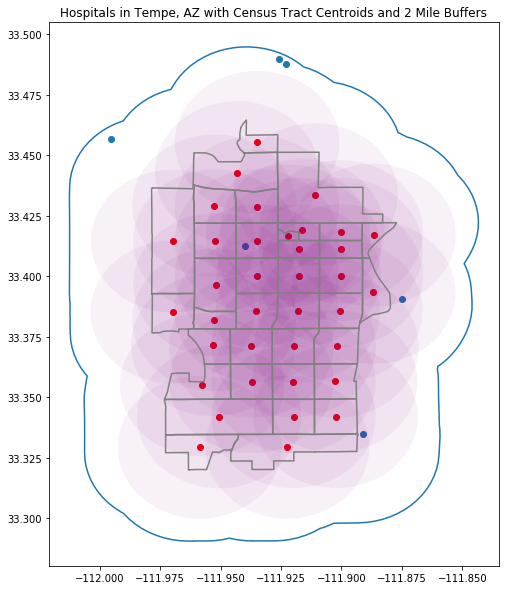

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
bndryConvertedB.boundary.plot(ax=ax)
#bdry.boundary.plot(ax=ax, color='black')
hospitals_gen.plot(ax=ax)
tempe.boundary.plot(ax=ax,color='grey')
tempe.centroid.plot(ax=ax, color='red')
tempeCentroidConvertedB.plot(ax=ax, color='purple',alpha=0.05)
plt.title("Hospitals in Tempe, AZ with Census Tract Centroids and 2 Mile Buffers")
plt.savefig('HospitalsTempeCentroid2MiMap.png')

### Long-Term Care

In [16]:
#LongTerm Care
url = 'https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/1/query?where=N_COUNTY+%3D+%27MARICOPA+COUNTY%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='

geo_lt = create_geo_df_mf(url,'LongTerm')

geo_lt.head()

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,SUN VALLEY LODGE,NURSING HOME (NH),STATE ONLY FACILITY,NH,58,12415 NORTH 103RD AVE,SUN CITY,MARICOPA,85351,33.597003,-112.281080,LongTerm,POINT (-112.28108 33.59700)
1,SHEA POST ACUTE REHABILITATION CENTER,NURSING HOME (NH),SNF/NF DUAL CERT,NH,120,11150 NORTH 92ND STREET,SCOTTSDALE,MARICOPA,85260,33.586574,-111.882923,LongTerm,POINT (-111.88292 33.58657)
2,MI CASA NURSING CENTER,NURSING HOME (NH),SNF/NF DUAL CERT,NH,180,330 SOUTH PINNULE CIRCLE,MESA,MARICOPA,85206,33.410733,-111.696363,LongTerm,POINT (-111.69636 33.41073)
3,SCOTTSDALE VILLAGE SQUARE,NURSING HOME (NH),SNF/NF DUAL CERT,NH,141,2620 NORTH 68TH STREET,SCOTTSDALE,MARICOPA,85257,33.476956,-111.934933,LongTerm,POINT (-111.93493 33.47696)
4,LIFE CARE CENTER OF NORTH GLENDALE,NURSING HOME (NH),SNF/NF DUAL CERT,NH,223,13620 NORTH 55TH AVENUE,GLENDALE,MARICOPA,85304,33.608325,-112.177339,LongTerm,POINT (-112.17734 33.60833)


In [17]:
longterm_2mi = facility_within_tempebuffer(geo_lt, bndryConvertedB)
longterm_2mi = longterm_2mi[longterm_2mi['Category'] != 'ICF/ICD']
nursing_homes = longterm_2mi
#This dataframe will be added to Residential Facilities and Medical to get counts for NursingAssistedLivingHospiceCounts2mi

**Residential Facilities

In [18]:
url = 'https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/4/query?where=N_COUNTY+%3D+%27MARICOPA+COUNTY%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='

geo_r = create_geo_df_mf(url, 'Res')

geo_r.head()

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,MARCOS AND SECILIA RAMON HOME CARE,AL HOME-DIRECTED,ASSISTED LIVING HOME-DIRECTED,AL Home,6,521 WEST PEPPER PLACE,MESA,MARICOPA,85201,33.416258,-111.842666,Res,POINT (-111.84267 33.41626)
1,"AZ TENDER LOVING CARE HOME, LLC",AL HOME-DIRECTED,ASSISTED LIVING HOME-DIRECTED,AL Home,10,13217 WEST RIMROCK STREET,SURPRISE,MARICOPA,85374,33.629244,-112.343993,Res,POINT (-112.34399 33.62924)
2,CONSTANT CARE ASSISTED LIVING NORTH CENTRAL,AL HOME-DIRECTED,ASSISTED LIVING HOME-DIRECTED,AL Home,5,5247 NORTH 6TH STREET,PHOENIX,MARICOPA,85012,33.515161,-112.066436,Res,POINT (-112.06644 33.51516)
3,ARCHANGEL ASSISTED LIVING II,AL HOME-DIRECTED,ASSISTED LIVING HOME-DIRECTED,AL Home,5,1442 EAST EBONY DRIVE,CHANDLER,MARICOPA,85286,33.249589,-111.816861,Res,POINT (-111.81686 33.24959)
4,PREFERRED CARE SOLUTIONS HOME (PCS HOME),Behavioral Health Facility,BH RESIDENTIAL FACILITY - ADULT,BH Residential,5,2651 NORTH 50TH AVENUE,PHOENIX,MARICOPA,85035,33.478807,-112.164902,Res,POINT (-112.16490 33.47881)


In [19]:
residential_2mi = facility_within_tempebuffer(geo_r, bndryConvertedB)
residential_child_2mi = residential_2mi[residential_2mi.Subtype.str.contains("CHILD")]
residential_2mi = residential_2mi[~residential_2mi.Subtype.str.contains("CHILD")]
residential_2mi = residential_2mi[residential_2mi['Type'] != 'AL AFC']
residential_2mi = residential_2mi[residential_2mi['Type'] != 'AL ADHC']
print(np.unique(residential_2mi['Category']))
res_mental = residential_2mi[residential_2mi['Category'] == 'BH Residential']
print(len(res_mental))
assisted_living = residential_2mi[residential_2mi['Category'] != 'BH Residential']
print(len(assisted_living))
print(len(residential_2mi))

['AL Center' 'AL Home' 'BH Residential']
12
55
67


In [20]:
child_res = residential_child_2mi

Combining LongTermCare Nursing homes with Residential Assisted living for Nursing_AssistedLiveCount2mi

In [21]:
nursing_assisted = pd.concat([nursing_homes, assisted_living],axis=0,
                       ignore_index=True,sort=False)
nursing_assisted['CountCategory'] = 'NursingAssisted'

### Medical Facilities

In [22]:
#Medical Facilities
url = 'https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/2/query?where=N_COUNTY+%3D+%27MARICOPA+COUNTY%27&objectIds=&time=&geometry=&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=102100&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='

geo_mf = create_geo_df_mf(url, 'MedFac')

geo_mf.head()

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,BAYLESS HEALTHCARE GROUP,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"2204 SOUTH DOBSON ROAD, SUITE 102",MESA,MARICOPA,85202,33.374945,-111.879873,MedFac,POINT (-111.87987 33.37494)
1,INTEGRO HEALTH SYSTEMS,Behavioral Health Inpatient Facility,INPT BH SUBACUTE,BH Inpatient,16,1501 EAST ORANGEWOOD AVENUE BUILDING A,PHOENIX,MARICOPA,85020,33.545327,-112.049316,MedFac,POINT (-112.04932 33.54533)
2,INTEGRO HEALTH SYSTEMS,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,15,1501 EAST ORANGEWOOD AVENUE,PHOENIX,MARICOPA,85020,33.545327,-112.049316,MedFac,POINT (-112.04932 33.54533)
3,BAYLESS HEALTHCARE GROUP,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,2204 SOUTH DOBSON ROAD SUITE 201,MESA,MARICOPA,85202,33.374945,-111.879873,MedFac,POINT (-111.87987 33.37494)
4,NATIVE HEALTH,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"777 WEST SOUTHERN AVENUE, BUILDING E, SUITE 501",MESA,MARICOPA,85210,33.393001,-111.848395,MedFac,POINT (-111.84839 33.39300)


In [23]:
med_2mi = facility_within_tempebuffer(geo_mf, bndryConvertedB)
med_child_2mi = med_2mi[med_2mi.Name.str.contains("CHILD")]
med_child_2mi1 = med_2mi[med_2mi.Name.str.contains("FAMILY")]
#print(med_child_2mi.head())
med_2mi = med_2mi[~med_2mi.Name.str.contains("CHILD")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("FAMILY")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("DIALYSIS")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("SLEEP")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("ELEVATE PEER SUPPORT")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("IMAGING")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("RENAL")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("RADIOLOGY")]
med_child_2mi2 = med_2mi[med_2mi.Name.str.contains("PEDIATRIC")]
med_child_2mi3 = med_2mi[med_2mi.Name.str.contains("ADOLESCENT")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("ADOLESCENT")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("PEDIATRIC")]
med_child_2mi = pd.concat([med_child_2mi, med_child_2mi1, med_child_2mi2, med_child_2mi3],axis=0,
                       ignore_index=True,sort=False)
med_2mi = med_2mi[~med_2mi.Name.str.contains("PEDIATRIC")]
med_2mi = med_2mi[med_2mi['Type'] != 'HOME HEALTH AGENCY (HHA)']
print(np.unique(med_2mi['Type']))#
med_2mi.head()

['AMBULATORY SURGICAL CENTER' 'AZ MEDICAL FACILITIES'
 'END STAGE RENAL DISEASE FACILITIES' 'FEDERALLY QUALIFIED HEALTH CENTER'
 'HOSPICE' 'MED-COUNSELING' 'MED-OUTPATIENT SURGERY CENTER'
 'MED-SINGLE GROUP LICENSURE/OTC' 'MED-UNCLASSIFIED'
 'OUTPATIENT PHYSICAL THERAPY/SPEECH PATHOLOGY SERVICES']


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,BAYLESS HEALTHCARE GROUP,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"2204 SOUTH DOBSON ROAD, SUITE 102",MESA,MARICOPA,85202,33.374945,-111.879873,MedFac,POINT (-111.87987 33.37494)
1,BAYLESS HEALTHCARE GROUP,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,2204 SOUTH DOBSON ROAD SUITE 201,MESA,MARICOPA,85202,33.374945,-111.879873,MedFac,POINT (-111.87987 33.37494)
2,NATIVE HEALTH,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"777 WEST SOUTHERN AVENUE, BUILDING E, SUITE 501",MESA,MARICOPA,85210,33.393001,-111.848395,MedFac,POINT (-111.84839 33.39300)
4,"S T A R - STAND TOGETHER AND RECOVER CENTERS, INC",MED-COUNSELING,COUNSELING,BH,0,1310 WEST UNIVERSITY DRIVE,MESA,MARICOPA,85201,33.422291,-111.857597,MedFac,POINT (-111.85760 33.42229)
5,"PSYCH SERVICES, LLC",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"1930 SOUTH ALMA SCHOOL ROAD, BUILDING B212",MESA,MARICOPA,85210,33.379866,-111.859960,MedFac,POINT (-111.85996 33.37987)


In [24]:
 
#med_bh_centers = med_2mi[med_2mi['Name'] == 'PRICE FAMILY SERVICES']
med_child_2mi.head()

,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,"CHILD AND FAMILY SUPPORT SERVICES, INC.",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"10439 SOUTH 51ST STREET, SUITE 100",PHOENIX,MARICOPA,85044,33.351880,-111.973252,MedFac,POINT (-111.97325 33.35188)
1,BANNER CHILDREN'S - BANNER HEALTH CLINIC,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"1450 SOUTH DOBSON ROAD, SUITE B220",MESA,MARICOPA,85202,33.389085,-111.874810,MedFac,POINT (-111.87481 33.38909)
2,BANNER CHILDREN'S SPECIALISTS,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"1432 SOUTH DOBSON ROAD, SUITE 304",MESA,MARICOPA,85202,33.389583,-111.874807,MedFac,POINT (-111.87481 33.38958)
3,"JEWISH FAMILY & CHILDREN'S SERVICE, INC.",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"1255 WEST BASELINE ROAD, SUITE B 258",MESA,MARICOPA,85202,33.378497,-111.861302,MedFac,POINT (-111.86130 33.37850)
4,BANNER CHILDREN'S SPECIALISTS,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"1432 SOUTH DOBSON ROAD, SUITE 506",MESA,MARICOPA,85202,33.389583,-111.874807,MedFac,POINT (-111.87481 33.38958)


In [25]:
#Combing Residential child dataframe with medical facility child dataframe for ChildFacilitiesCount2mi
child_facilities = pd.concat([child_res, med_child_2mi],axis=0,
                       ignore_index=True,sort=False)
child_facilities['CountCategory'] = 'ChildFacilities'

In [26]:
substance_help = med_2mi[med_2mi.Name.str.contains("RECOVERY")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("RECOVERY")]
substance_help

,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
6,"AWAKENING RECOVERY CENTER, LLC",MED-COUNSELING,COUNSELING,BH,0,"1204 EAST BASELINE ROAD, SUITE 208",TEMPE,MARICOPA,85283,33.378463,-111.920074,MedFac,POINT (-111.92007 33.37846)
8,CHOICE RECOVERY CENTERS,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"2222 SOUTH DOBSON ROAD, SUITE 1002",MESA,MARICOPA,85202,33.374380,-111.880172,MedFac,POINT (-111.88017 33.37438)
25,"CRISIS PREPARATION & RECOVERY, INC",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"2120 SOUTH MCCLINTOCK DRIVE, SUITE 105",TEMPE,MARICOPA,85282,33.405086,-111.909257,MedFac,POINT (-111.90926 33.40509)
29,"INVITATION2RECOVERY, LLC",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"7281 EAST EARLL DRIVE, SUITE A2",SCOTTSDALE,MARICOPA,85251,33.483868,-111.924878,MedFac,POINT (-111.92488 33.48387)


In [27]:
hospice_centers = med_2mi[med_2mi['Type'] == 'HOSPICE']
med_2mi = med_2mi[med_2mi['Type'] != 'HOSPICE']

med_bh_centers = med_2mi[med_2mi['Category'] == 'BH']
med_2mi = med_2mi[med_2mi['Category'] != 'BH']

womens_clinics = med_2mi[med_2mi.Name.str.contains("WOMEN")]
print(len(womens_clinics))
med_2mi = med_2mi[~med_2mi.Name.str.contains("WOMEN")]

physical_therapy = med_2mi[med_2mi.Name.str.contains("PHYSICAL THERAPY")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("PHYSICAL THERAPY")]

surgical_centers1 = med_2mi[med_2mi.Name.str.contains("SURGERY")]
surgical_centers2 = med_2mi[med_2mi.Name.str.contains("SURGICAL")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("SURGICAL")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("SURGERY")]
surgical_centers = pd.concat([surgical_centers1, surgical_centers2],axis=0,
                       ignore_index=True,sort=False)

urgent_care = med_2mi[med_2mi.Name.str.contains("URGENT")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("URGENT")]

pain_management = med_2mi[med_2mi.Name.str.contains("PAIN")]
med_2mi = med_2mi[~med_2mi.Name.str.contains("PAIN")]
med_2mi.head()

1


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,BAYLESS HEALTHCARE GROUP,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"2204 SOUTH DOBSON ROAD, SUITE 102",MESA,MARICOPA,85202,33.374945,-111.879873,MedFac,POINT (-111.87987 33.37494)
1,BAYLESS HEALTHCARE GROUP,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,2204 SOUTH DOBSON ROAD SUITE 201,MESA,MARICOPA,85202,33.374945,-111.879873,MedFac,POINT (-111.87987 33.37494)
2,NATIVE HEALTH,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"777 WEST SOUTHERN AVENUE, BUILDING E, SUITE 501",MESA,MARICOPA,85210,33.393001,-111.848395,MedFac,POINT (-111.84839 33.39300)
5,"PSYCH SERVICES, LLC",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"1930 SOUTH ALMA SCHOOL ROAD, BUILDING B212",MESA,MARICOPA,85210,33.379866,-111.859960,MedFac,POINT (-111.85996 33.37987)
15,RELIEVE MEDICAL DETOX,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,"7283 EAST EARLL DRIVE, BUILDING B, STE 1",SCOTTSDALE,MARICOPA,85251,33.483868,-111.924799,MedFac,POINT (-111.92480 33.48387)


In [28]:
med_bh_centers = med_bh_centers.append(med_2mi.loc[5], ignore_index=True)
med_bh_centers = med_bh_centers.append(med_2mi.loc[21], ignore_index=True)
med_bh_centers = med_bh_centers.append(med_2mi.loc[23], ignore_index=True)
med_bh_centers = med_bh_centers.append(med_2mi.loc[95], ignore_index=True)

substance_help = substance_help.append(med_2mi.loc[15], ignore_index=True)
substance_help = substance_help.append(med_2mi.loc[41], ignore_index=True)
substance_help = substance_help.append(med_2mi.loc[129], ignore_index=True)

physical_therapy = physical_therapy.append(med_2mi.loc[87], ignore_index=True)
physical_therapy = physical_therapy.append(med_2mi.loc[126], ignore_index=True)

urgent_care = urgent_care.append(med_2mi.loc[59],ignore_index=True)
urgent_care = urgent_care.append(med_2mi.loc[108],ignore_index=True)

pain_management = pain_management.append(med_2mi.loc[128],ignore_index=True)

surgical_centers = surgical_centers.append(med_2mi.loc[120],ignore_index=True)

med_2mi.drop([5, 21, 15, 23, 41, 87, 126, 59, 95, 108, 129, 128, 120], inplace=True)
len(med_2mi)

39

In [29]:
mental_facilities = pd.concat([res_mental, med_bh_centers],axis=0,
                       ignore_index=True,sort=False)

In [30]:
hospice_centers['CountCategory'] = 'Hospice'

womens_clinics['CountCategory'] = 'WomensClinic'
 
physical_therapy['CountCategory'] = 'PhysicalTherapy'

surgical_centers['CountCategory'] = 'SurgicalCenters'

urgent_care['CountCategory'] = 'UrgentCare'

pain_management['CountCategory'] = 'PainManagement'

med_2mi['CountCategory'] = 'MedicalFacility'

### DUI/Domestic Violence

In [31]:
#DUI/Domestic Violence
url='https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/7/query?where=N_COUNTY+%3D+%27MARICOPA+COUNTY%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='

geo_dui = create_geo_df_mf(url, 'DUI/DV')

geo_dui.head()


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,CONFIDENTIAL COUNSELING & CONSULTING LLC,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,4625 SOUTH LAKESHORE DRIVE,TEMPE,MARICOPA,85282,33.381618,-111.924170,DUI/DV,POINT (-111.92417 33.38162)
1,INTUITIVE HEALING COUNSELING SERVICES,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,"3303 EAST BASELINE ROAD, BLDG 5, SUITE 109",GILBERT,MARICOPA,85234,33.378917,-111.762337,DUI/DV,POINT (-111.76234 33.37892)
2,RECLAIM U COUNSELING,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,"2111 EAST BASELINE ROAD, SUITE B-3",TEMPE,MARICOPA,85283,33.378312,-111.896908,DUI/DV,POINT (-111.89691 33.37831)
3,"RAYIOM HEALTH & WELLNESS, INC",SL-Court Ordered Services,DUI/DVTX,MED - Other,0,2390 EAST CAMELBACK ROAD #130,PHOENIX,MARICOPA,85016,33.509528,-112.031561,DUI/DV,POINT (-112.03156 33.50953)
4,BRIDGING THE HOPE COUNSELING SERVICES,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,5320 N16TH STREET,PHOENIX,MARICOPA,85016,33.514953,-112.047691,DUI/DV,POINT (-112.04769 33.51495)


In [32]:
dui_2mi = facility_within_tempebuffer(geo_dui, bndryConvertedB)
dui_2mi = dui_2mi[~dui_2mi.Name.str.contains("RECOVERY")]
dui_2mi.drop([2], inplace=True)
dui_2mi

,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry
0,CONFIDENTIAL COUNSELING & CONSULTING LLC,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,4625 SOUTH LAKESHORE DRIVE,TEMPE,MARICOPA,85282,33.381618,-111.924170,DUI/DV,POINT (-111.92417 33.38162)
1,RECLAIM U COUNSELING,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,"2111 EAST BASELINE ROAD, SUITE B-3",TEMPE,MARICOPA,85283,33.378312,-111.896908,DUI/DV,POINT (-111.89691 33.37831)


In [33]:
substance_help = substance_help.append(dui_2mi.loc[1], ignore_index=True)
dui_2mi.drop([1], inplace=True)

In [34]:
substance_help['CountCategory'] = 'SubstanceHelp'

In [35]:
mental_facilities = mental_facilities.append(dui_2mi.loc[0], ignore_index=True)
mental_facilities['CountCategory'] = 'MentalFacilities'

**Count for others

In [36]:
medFacCendf['SurgicalCentersCount2mi'] = counting_facilities(surgical_centers)
medFacCendf['UrgentCareCount2mi'] = counting_facilities(urgent_care)
medFacCendf['WomensClinicsCount2mi'] = counting_facilities(womens_clinics)
medFacCendf['PainManagementCount2mi'] = counting_facilities(pain_management)
medFacCendf['PhysicalTherapyCount2mi'] = counting_facilities(physical_therapy)
medFacCendf['MentalFacilitiesCount2mi'] = counting_facilities(mental_facilities)
medFacCendf['SubstanceAbuseCount2mi'] = counting_facilities(substance_help)
medFacCendf['OtherMedicalFacilitesCount2mi'] = counting_facilities(med_2mi)
medFacCendf['NursingAssistedLiveCount2mi'] = counting_facilities(nursing_assisted)
medFacCendf['HospiceCount2mi'] = counting_facilities(hospice_centers)
medFacCendf['ChildFacilitiesCount2mi'] = counting_facilities(child_facilities)

medFacCendf.head()

{'3188': 0, '3191.01': 0, '3189': 0, '3190': 0, '3194.03': 3, '3197.03': 0, '3194.04': 4, '3195': 1, '3197.04': 0, '3196': 0, '3191.03': 0, '3191.04': 0, '3192.01': 0, '3192.02': 1, '3197.05': 0, '3197.06': 0, '3201': 0, '8100': 0, '8101': 2, '3198': 0, '3199.02': 0, '3199.03': 1, '3199.04': 4, '3199.05': 2, '3199.06': 3, '3199.10': 0, '3200.01': 0, '3199.08': 0, '3199.09': 2, '3200.07': 0, '3184': 0, '3187': 0, '3193': 1, '3194.01': 1, '3194.02': 3, '3199.07': 2, '3185.01': 2}
{'3188': 0, '3191.01': 0, '3189': 0, '3190': 0, '3194.03': 0, '3197.03': 0, '3194.04': 0, '3195': 1, '3197.04': 0, '3196': 1, '3191.03': 0, '3191.04': 0, '3192.01': 0, '3192.02': 0, '3197.05': 1, '3197.06': 1, '3201': 0, '8100': 0, '8101': 1, '3198': 1, '3199.02': 1, '3199.03': 1, '3199.04': 1, '3199.05': 1, '3199.06': 0, '3199.10': 0, '3200.01': 0, '3199.08': 1, '3199.09': 1, '3200.07': 1, '3184': 0, '3187': 0, '3193': 0, '3194.01': 1, '3194.02': 1, '3199.07': 0, '3185.01': 0}
{'3188': 0, '3191.01': 0, '3189': 

,TempeTracts_Name,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi
0,3188,1,0,0,0,0,1,0,2,0,10,2,0,1
1,3191.01,1,0,0,0,0,1,1,4,2,6,1,0,1
2,3189,1,0,0,0,0,1,0,2,0,11,1,1,1
3,3190,1,0,0,0,0,1,0,3,1,8,1,0,1
4,3194.03,1,0,3,0,0,0,3,5,4,8,8,0,9


### All Medical Facilities 

In [37]:
facilities_2mi = pd.concat([hospitals_gen,hospitals_ment, surgical_centers,urgent_care,womens_clinics,
                           pain_management, physical_therapy, mental_facilities, substance_help,
                           med_2mi, nursing_assisted,hospice_centers, child_facilities],axis=0,
                       ignore_index=True,sort=False)

facilities_2mi.head()

,Name,Type,Subtype,Category,Capacity,Address,City,County,Zip,Lat,Lon,Layer,geometry,CountCategory
0,ARIZONA SPECIALTY HOSPITAL,HOSPITAL,SHORT TERM,HOSPITAL,24,"2905 WEST WARNER ROAD, SUITE 1",CHANDLER,MARICOPA,85224,33.334700,-111.891218,Hospital,POINT (-111.89122 33.33470),HospitalsGeneral
1,BANNER DESERT MEDICAL CENTER,HOSPITAL,SHORT TERM,HOSPITAL,615,1400 SOUTH DOBSON ROAD,MESA,MARICOPA,85202,33.390773,-111.874786,Hospital,POINT (-111.87479 33.39077),HospitalsGeneral
2,SCOTTSDALE OSBORN MEDICAL CENTER,HOSPITAL,SHORT TERM,HOSPITAL,341,7400 EAST OSBORN ROAD,SCOTTSDALE,MARICOPA,85251,33.487776,-111.922888,Hospital,POINT (-111.92289 33.48778),HospitalsGeneral
3,O.A.S.I.S. HOSPITAL,HOSPITAL,SHORT TERM,HOSPITAL,64,750 NORTH 40TH STREET,PHOENIX,MARICOPA,85008,33.456559,-111.995377,Hospital,POINT (-111.99538 33.45656),HospitalsGeneral
4,"TEMPE ST LUKE'S HOSPITAL, A CAMPUS OF ST LUKE'...",HOSPITAL,SHORT TERM,HOSPITAL,74,1500 SOUTH MILL AVENUE,TEMPE,MARICOPA,85281,33.412378,-111.940084,Hospital,POINT (-111.94008 33.41238),HospitalsGeneral


In [529]:
#facConvertedB = buffer_mi(facilities_2mi, 2)
#facConvertedB.head()

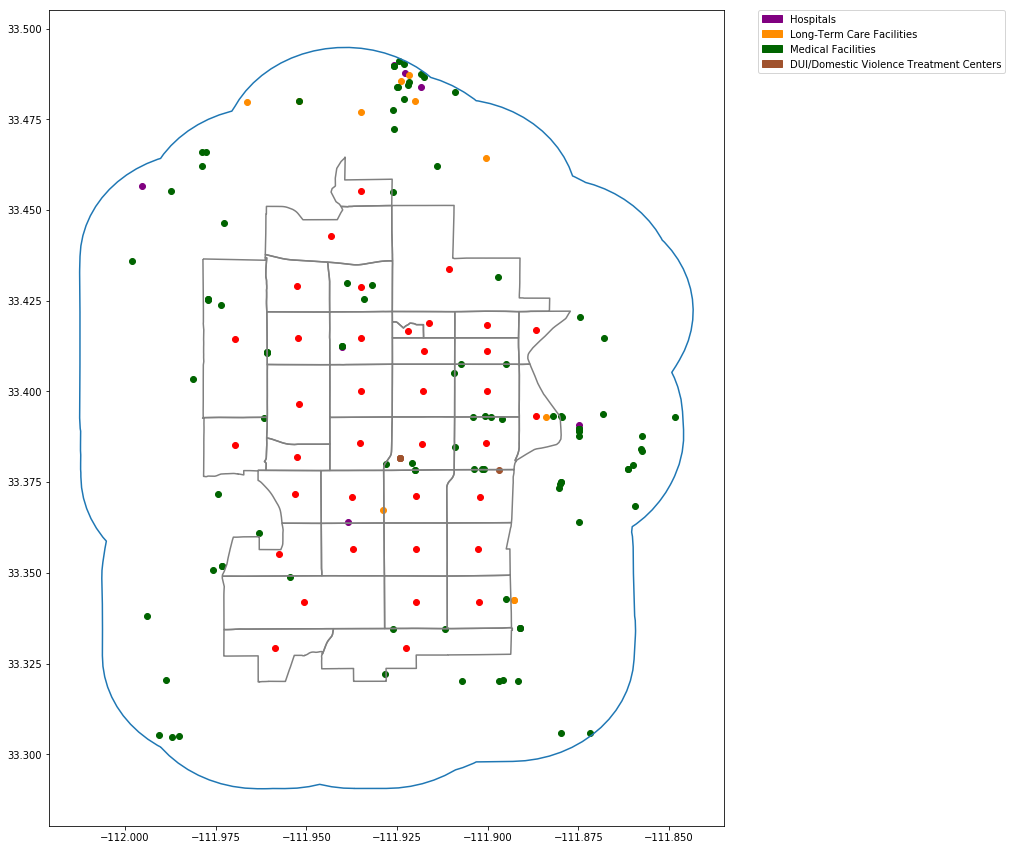

In [173]:
types = ['Hospital','Long-Term Care','Medical Facility','DUI/Domestic Violence']
colors = ['purple','darkorange','darkgreen','sienna']

import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15,15))
bndryConvertedB.boundary.plot(ax=ax)
#bdry.boundary.plot(ax=ax, color='black')
tempe.boundary.plot(ax=ax,color='grey')
tempe.centroid.plot(ax=ax, color='red')

#color coded
facilities_2mi[facilities_2mi['Layer']=='Hospital'].plot(ax=ax,color='purple')
#facConvertedB[facConvertedB['Layer']=='Hospital'].plot(ax=ax, label=str(types[i]),color='purple',alpha=0.08)
facilities_2mi[facilities_2mi['Layer']=='LongTerm'].plot(ax=ax,color='darkorange')
#facConvertedB[facConvertedB['Layer']=='LongTerm'].plot(ax=ax, label=str(types[i]),color='darkorange',alpha=0.08)
facilities_2mi[facilities_2mi['Layer']=='MedFac'].plot(ax=ax,color='darkgreen')
#facConvertedB[facConvertedB['Layer']=='MedFac'].boundary.plot(ax=ax, label=str(types[i]),color='darkgreen',alpha=0.2)
facilities_2mi[facilities_2mi['Layer']=='DUI/DV'].plot(ax=ax,color='sienna')
#facConvertedB[facConvertedB['Layer']=='DUI/DV'].plot(ax=ax, label=str(types[i]),color='sienna',alpha=0.08)


h = mpatches.Patch(color='purple',label='Hospitals')
lt = mpatches.Patch(color='darkorange',label = 'Long-Term Care Facilities')
mf = mpatches.Patch(color='darkgreen',label = 'Medical Facilities')
dui = mpatches.Patch(color = 'sienna',label = 'DUI/Domestic Violence Treatment Centers')
l2 = plt.legend(handles=[h,lt,mf,dui],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)




In [38]:

with open('DataFiles/medicalFacilitiesWithin2milesTempeFULL.pkl', 'wb') as pkl_file:
    pkl.dump(facilities_2mi, pkl_file)

with open('DataFiles/FacilityData/medicalFacilitiesWithin2milesTempeFULL.pkl', 'wb') as pkl_file:
    pkl.dump(facilities_2mi, pkl_file)
    
facilities_2mi.to_csv(r'DataFiles/FacilityData/MedicalFacilitiesWithin2milesTempeFULL.csv')

## Pharmacies

In [39]:
url='https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/Pharmacies/FeatureServer/0/query?where=N_COUNTY+%3D+%27MARICOPA+COUNTY%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()

p_data = pd.io.json.json_normalize(data_raw['features'])

desired_cols = ['attributes.Business_N','attributes.Type_',
               'attributes.SubType_',
               'attributes.City',
               'attributes.N_ZIP','attributes.N_LAT',
               'attributes.N_LON']

p_df = p_data[desired_cols]

p_df.columns =['Name','Type','Subtype','City',
                'Zip','Lat','Lon']

tempe_p = pd.DataFrame(p_df)

geometry = [Point(xy) for xy in zip(tempe_p['Lon'],tempe_p['Lat'])]


geo_p = gpd.GeoDataFrame(tempe_p, crs = crs, geometry = geometry)
geo_p.head()

<Response [200]>


,Name,Type,Subtype,City,Zip,Lat,Lon,geometry
0,Walgreens Drug #01272,Pharmacy,Chain,Phoenix,85031,33.494732,-112.169111,POINT (-112.16911 33.49473)
1,Scottsdale Osborn Medical Center Pharmacy,Pharmacy,Hospital,Scottsdale,85251,33.487776,-111.922888,POINT (-111.92289 33.48778)
2,Walgreens Drug #16082,Pharmacy,Chain,Phoenix,85028,33.582619,-112.013259,POINT (-112.01326 33.58262)
3,Walgreens Drug #01197,Pharmacy,Chain,Tempe,85282,33.392813,-111.910238,POINT (-111.91024 33.39281)
4,Walgreens Drug #03593,Pharmacy,Chain,Phoenix,85023,33.611118,-112.111889,POINT (-112.11189 33.61112)


In [40]:
pharm_2mi = facility_within_tempebuffer(geo_p, bndryConvertedB)
len(pharm_2mi)

116

In [41]:
medFacCendf['PharmCount2mi'] = counting_facilities(pharm_2mi)

medFacCendf.head()

{'3188': 11, '3191.01': 14, '3189': 16, '3190': 17, '3194.03': 20, '3197.03': 13, '3194.04': 19, '3195': 16, '3197.04': 17, '3196': 17, '3191.03': 13, '3191.04': 14, '3192.01': 13, '3192.02': 15, '3197.05': 18, '3197.06': 13, '3201': 3, '8100': 21, '8101': 14, '3198': 18, '3199.02': 16, '3199.03': 14, '3199.04': 9, '3199.05': 13, '3199.06': 12, '3199.10': 14, '3200.01': 14, '3199.08': 13, '3199.09': 12, '3200.07': 13, '3184': 7, '3187': 9, '3193': 13, '3194.01': 16, '3194.02': 17, '3199.07': 14, '3185.01': 5}


,TempeTracts_Name,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi
0,3188,1,0,0,0,0,1,0,2,0,10,2,0,1,11
1,3191.01,1,0,0,0,0,1,1,4,2,6,1,0,1,14
2,3189,1,0,0,0,0,1,0,2,0,11,1,1,1,16
3,3190,1,0,0,0,0,1,0,3,1,8,1,0,1,17
4,3194.03,1,0,3,0,0,0,3,5,4,8,8,0,9,20


## Drug Drop Off Locations

In [42]:
url = 'https://services1.arcgis.com/mpVYz37anSdrK4d8/arcgis/rest/services/DrugDropOffLocations/FeatureServer/0/query?where=N_COUNTY+%3D+%27MARICOPA+COUNTY%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()

dd_data = pd.io.json.json_normalize(data_raw['features'])

desired_cols = ['attributes.Location',
               'attributes.N_CITY',
               'attributes.N_ZIP','attributes.N_LAT',
               'attributes.N_LON']

dd_df = dd_data[desired_cols]

dd_df.columns =['Location','City',
                'Zip','Lat','Lon']

tempe_dd = pd.DataFrame(dd_df)

geometry = [Point(xy) for xy in zip(tempe_dd['Lon'],tempe_dd['Lat'])]


geo_dd = gpd.GeoDataFrame(tempe_dd, crs = crs, geometry = geometry)
geo_dd.head()

<Response [200]>


,Location,City,Zip,Lat,Lon,geometry
0,"Mountain Park Health Center, Maryvale",PHOENIX,85033,33.480216,-112.200886,POINT (-112.20089 33.48022)
1,Buckeye Police Department,BUCKEYE,85326,33.435517,-112.517596,POINT (-112.51760 33.43552)
2,Chandler Police Department,CHANDLER,85225,33.300739,-111.838065,POINT (-111.83807 33.30074)
3,Chandler Police Department Substation,CHANDLER,85249,33.233931,-111.770888,POINT (-111.77089 33.23393)
4,El Mirage Police Department,EL MIRAGE,85335,33.574272,-112.326009,POINT (-112.32601 33.57427)


In [43]:
drug_2mi = facility_within_tempebuffer(geo_dd, bndryConvertedB)
len(drug_2mi)

8

In [44]:
medFacCendf['DrugDropCount2mi'] = counting_facilities(drug_2mi)

medFacCendf.head()

{'3188': 2, '3191.01': 4, '3189': 2, '3190': 3, '3194.03': 2, '3197.03': 0, '3194.04': 3, '3195': 3, '3197.04': 0, '3196': 4, '3191.03': 4, '3191.04': 4, '3192.01': 3, '3192.02': 3, '3197.05': 1, '3197.06': 0, '3201': 2, '8100': 0, '8101': 0, '3198': 2, '3199.02': 0, '3199.03': 1, '3199.04': 1, '3199.05': 0, '3199.06': 0, '3199.10': 0, '3200.01': 0, '3199.08': 0, '3199.09': 1, '3200.07': 0, '3184': 4, '3187': 4, '3193': 1, '3194.01': 1, '3194.02': 2, '3199.07': 0, '3185.01': 1}


,TempeTracts_Name,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi
0,3188,1,0,0,0,0,1,0,2,0,10,2,0,1,11,2
1,3191.01,1,0,0,0,0,1,1,4,2,6,1,0,1,14,4
2,3189,1,0,0,0,0,1,0,2,0,11,1,1,1,16,2
3,3190,1,0,0,0,0,1,0,3,1,8,1,0,1,17,3
4,3194.03,1,0,3,0,0,0,3,5,4,8,8,0,9,20,2


## Naloxone Distributors 

https://services3.arcgis.com/1pxU2hJU9ZszJDcX/ArcGIS/rest/services/PrescriptionDrugLocations/FeatureServer/0

In [45]:
url='https://services3.arcgis.com/1pxU2hJU9ZszJDcX/ArcGIS/rest/services/PrescriptionDrugLocations/FeatureServer/0/query?where=%28municipality+%3D+%27TEMPE%27%29+OR+%28municipality+%3D+%27SCOTTSDALE%27%29+OR+%28municipality+%3D+%27PHOENIX%27%29+OR+%28municipality+%3D+%27MESA%27%29+OR+%28municipality+%3D+%27CHANDLER%27%29&objectIds=&time=&geometry=&geometryType=esriGeometryPolygon&inSR=&spatialRel=esriSpatialRelIntersects&resultType=standard&distance=0.0&units=esriSRUnit_Kilometer&returnGeodetic=true&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=true&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=true&returnM=true&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()

n_data = pd.io.json.json_normalize(data_raw['features'])

n_data.columns



<Response [200]>


Index(['attributes.CreationDate', 'attributes.Creator', 'attributes.EditDate',
       'attributes.Editor', 'attributes.GlobalID', 'attributes.OBJECTID',
       'attributes.PhoneNumber', 'attributes.PrescriptionNeeded',
       'attributes.Reviewed', 'attributes.Source', 'attributes.agencyurl',
       'attributes.comments', 'attributes.fulladdr', 'attributes.municipality',
       'attributes.name', 'attributes.operdays', 'attributes.operhours',
       'attributes.phone', 'attributes.pocemail', 'attributes.pocname',
       'attributes.pocphone', 'geometry.x', 'geometry.y'],
      dtype='object')

In [48]:
crs = {'init': 'epsg:4326'}
desired_cols = ['attributes.name',
               'attributes.fulladdr',
               'attributes.municipality','geometry.x',
               'geometry.y']

n_df = n_data[desired_cols]

n_df.columns =['Name','FullAddr',
                'City','Lat','Long']

n_df = pd.DataFrame(n_df)

#geometry = [Point(xy) for xy in zip(tempe_n['Lon'],tempe_n['Lat'])]


#geo_n = gpd.GeoDataFrame(tempe_n, crs = crs, geometry = geometry)
#geo_n.head()
n_df = n_df[n_df['City'] != 'Phoenix']
n_df.head()
np.unique(n_df['City'])

array(['CHANDLER', 'MESA', 'PHOENIX', 'Phoenix ', 'SCOTTSDALE', 'TEMPE'],
      dtype=object)

In [49]:
from geopy.geocoders import Nominatim

def naloxone_address(df, city):
    """takes dataframe and returns the latitude and longitude and makes geopandas dataframe 
    Args:
        df (dataframe) - dataframe to get addresses from
    Returns:
        geo_df - new geopandas dataframe that has the latitude and longitude of the points
    """
    new_df = pd.DataFrame()

    lats = []
    longs = []
    c_df = df[df['City'] == city]
    c_df.reset_index(inplace=True)
    c_df.drop(['index'], axis=1, inplace=True)

    if city == 'TEMPE':
        geolocator = Nominatim(user_agent="my_app", format_string="%s, Tempe Arizona")
        for i in range(len(c_df)):
            #print(c_df.loc[i,'City'])
            address = c_df.loc[i,'FullAddr']
            if address == '3303 S. RURAL':
                address = '3303 S. RURAL RD.'
            location = geolocator.geocode(address)
            #print(location)
            lat = location.latitude
            long = location.longitude
            lats.append(lat)
            longs.append(long)
        c_df['Lat'] = lats
        c_df['Long'] = longs
        new_df = c_df
    elif city == 'PHOENIX' or city == 'Phoenix ':
        geolocator = Nominatim(user_agent="my_app", format_string="%s, Phoenix Arizona")
        for i in range(len(c_df)):
            #print(c_df.loc[i,'City'])
            address = c_df.loc[i,'FullAddr']
            if address == '50 W. JEFFERSON ST., SUITE 140':
                address = '50 W. JEFFERSON ST. #140'
            if address == '4742 E. INDIAN SCHOOL':
                geolocator = Nominatim(user_agent="my_app", format_string="%s, Phoenix")
                address = '4742 E. INDIAN SCHOOL RD.'
            location = geolocator.geocode(address)
            #print(location)
            lat = location.latitude
            long = location.longitude
            lats.append(lat)
            longs.append(long)
        c_df['Lat'] = lats
        c_df['Long'] = longs
        new_df = c_df
    elif city == 'MESA':
        geolocator = Nominatim(user_agent="my_app", format_string="%s, Mesa Arizona")
        for i in range(len(c_df)):
            #print(c_df.loc[i,'City'])
            address = c_df.loc[i,'FullAddr']
            location = geolocator.geocode(address)
            if location is None:
                geolocator = Nominatim(user_agent="my_app", format_string="%s, Mesa, AZ")
                location = geolocator.geocode(address)
                #print(address)
                if location is None:
                    geolocator = Nominatim(user_agent="my_app", format_string="%s, Arizona")
                    location = geolocator.geocode(address)
                    #print(address)
            #print(location)
            lat = location.latitude
            long = location.longitude
            lats.append(lat)
            longs.append(long)
        c_df['Lat'] = lats
        c_df['Long'] = longs
        new_df = c_df
    elif city == 'SCOTTSDALE':
        geolocator = Nominatim(user_agent="my_app", format_string="%s, Scottsdale Arizona")
        for i in range(len(c_df)):
            #print(c_df.loc[i,'City'])
            address = c_df.loc[i,'FullAddr']
            if address == '14672 N FRANK LLOYD WRIGHT':
                address = '14672 N FRANK LLOYD WRIGHT BLVD'
            if address == '23215 NO PIMA RD.':
                address = '23215 N. PIMA RD.'
            #print(address)
            location = geolocator.geocode(address)
            if location is None:
                geolocator = Nominatim(user_agent="my_app", format_string="%s, Arizona")
                location = geolocator.geocode(address)
            #print(location)
            lat = location.latitude
            long = location.longitude
            lats.append(lat)
            longs.append(long)
        c_df['Lat'] = lats
        c_df['Long'] = longs
        new_df = c_df
    else:
        geolocator = Nominatim(user_agent="my_app", format_string="%s, Chandler Arizona")
        for i in range(len(c_df)):
            #print(c_df.loc[i,'City'])
            address = c_df.loc[i,'FullAddr']
            if address == '14672 N FRANK LLOYD WRIGHT':
                address = '14672 N FRANK LLOYD WRIGHT BLVD'
            if address == '23215 NO PIMA RD.':
                address = '23215 N. PIMA RD.'
            #print(address)
            location = geolocator.geocode(address)
            if location is None:
                geolocator = Nominatim(user_agent="my_app", format_string="%s, Arizona")
                location = geolocator.geocode(address)
            #print(location)
            lat = location.latitude
            long = location.longitude
            lats.append(lat)
            longs.append(long)
        c_df['Lat'] = lats
        c_df['Long'] = longs
        new_df = c_df
    geometry = [Point(xy) for xy in zip(new_df['Long'],new_df['Lat'])]
    geo_df = gpd.GeoDataFrame(new_df, crs = crs, geometry = geometry)
    return(geo_df)
                
                
                

In [50]:
tempen_df = naloxone_address(n_df, 'TEMPE')
tempen_df.head()

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

,Name,FullAddr,City,Lat,Long,geometry
0,Walmart,1380 W ELLIOT RD,TEMPE,33.351075,-111.960451,POINT (-111.96045 33.35108)
1,Walmart,800 E SOUTHERN AVE,TEMPE,33.393954,-111.927870,POINT (-111.92787 33.39395)
2,Walmart,671 E APACHE BLVD,TEMPE,33.414881,-111.917139,POINT (-111.91714 33.41488)
3,CVS Pharmacy,1750 E BROADWAY RD,TEMPE,33.407593,-111.909937,POINT (-111.90994 33.40759)
4,CVS Pharmacy,1424 W BASELINE RD,TEMPE,33.378930,-111.962296,POINT (-111.96230 33.37893)


In [51]:
phoenix_df1 = naloxone_address(n_df, "PHOENIX")
phoenix_df2 = naloxone_address(n_df, 'Phoenix ')

phoenix_df = pd.concat([phoenix_df1, phoenix_df2],axis=0,
                       ignore_index=True,sort=False)

phoenix_df.head()

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,FullAddr,City,Lat,Long,geometry
0,Walmart,2020 N 75TH AVE,PHOENIX,33.470553,-112.223178,POINT (-112.22318 33.47055)
1,Walmart,4617 E BELL RD,PHOENIX,33.638451,-111.981796,POINT (-111.98180 33.63845)
2,Walmart,1607 W BETHANY HOME RD,PHOENIX,33.522077,-112.092775,POINT (-112.09278 33.52208)
3,Walmart,1825 W BELL RD,PHOENIX,33.637084,-112.098050,POINT (-112.09805 33.63708)
4,Walmart,3721 E THOMAS RD,PHOENIX,33.478787,-112.001086,POINT (-112.00109 33.47879)


In [52]:
mesa_df = naloxone_address(n_df, 'MESA')
mesa_df.head()


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,FullAddr,City,Lat,Long,geometry
0,Walmart,6131 E SOUTHERN AVE,MESA,33.391422,-111.699176,POINT (-111.69918 33.39142)
1,Walmart,857 N DOBSON RD,MESA,33.432013,-111.865325,POINT (-111.86532 33.43201)
2,Walmart,4505 E MCKELLIPS RD,MESA,33.449105,-111.733671,POINT (-111.73367 33.44911)
3,Walmart,5122 E UNIVERSITY DR,MESA,33.423782,-111.720797,POINT (-111.72080 33.42378)
4,Walmart,1916 S LINDSAY RD,MESA,33.380320,-111.772934,POINT (-111.77293 33.38032)


In [53]:
scottsdale_df = naloxone_address(n_df, 'SCOTTSDALE')

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
chandler_df = naloxone_address(n_df, 'CHANDLER')

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
geo_n = pd.concat([tempen_df, phoenix_df, mesa_df, scottsdale_df,chandler_df],axis=0,
                       ignore_index=True,sort=False)


nal_2mi = facility_within_tempebuffer(geo_n, bndryConvertedB)
#nalConvertedB = buffer_mi(nal_2mi, 2)

nal_2mi.head()

,Name,FullAddr,City,Lat,Long,geometry
0,Walmart,1380 W ELLIOT RD,TEMPE,33.351075,-111.960451,POINT (-111.96045 33.35108)
1,Walmart,800 E SOUTHERN AVE,TEMPE,33.393954,-111.927870,POINT (-111.92787 33.39395)
2,Walmart,671 E APACHE BLVD,TEMPE,33.414881,-111.917139,POINT (-111.91714 33.41488)
3,CVS Pharmacy,1750 E BROADWAY RD,TEMPE,33.407593,-111.909937,POINT (-111.90994 33.40759)
4,CVS Pharmacy,1424 W BASELINE RD,TEMPE,33.378930,-111.962296,POINT (-111.96230 33.37893)


40


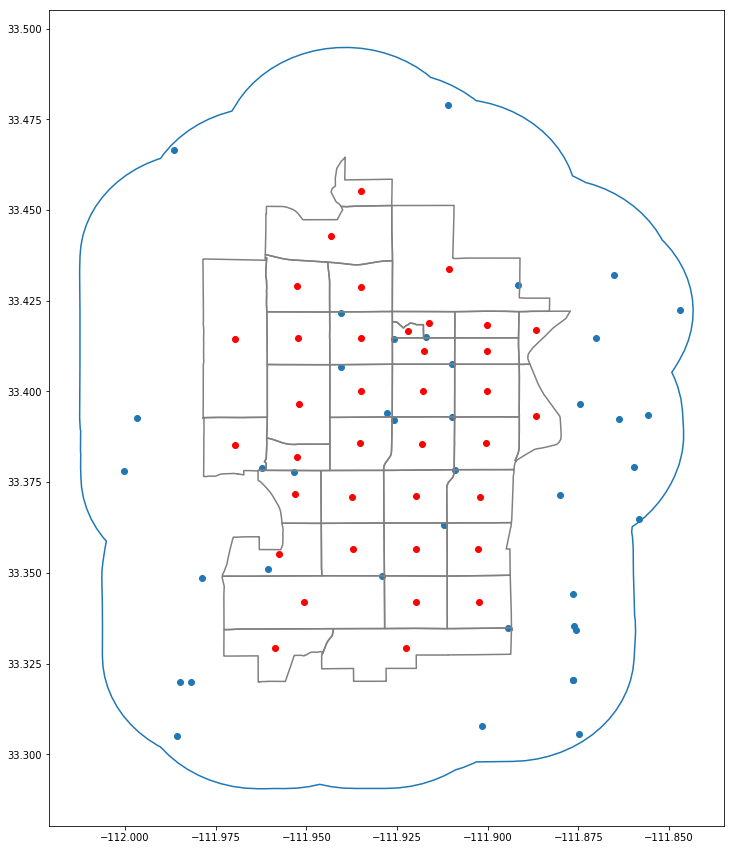

In [57]:
fig, ax = plt.subplots(figsize=(15,15))
bndryConvertedB.boundary.plot(ax=ax)
#bdry.boundary.plot(ax=ax, color='black')
tempe.boundary.plot(ax=ax,color='grey')
tempe.centroid.plot(ax=ax, color='red')
#nalConvertedB.plot(ax=ax,alpha=0.1)
nal_2mi.plot(ax=ax)
print(len(nal_2mi))

In [58]:
medFacCendf['NaloxoneDistribCount2mi'] = counting_facilities(nal_2mi)

medFacCendf.head()

{'3188': 3, '3191.01': 9, '3189': 3, '3190': 7, '3194.03': 8, '3197.03': 4, '3194.04': 9, '3195': 9, '3197.04': 2, '3196': 9, '3191.03': 9, '3191.04': 9, '3192.01': 6, '3192.02': 9, '3197.05': 7, '3197.06': 5, '3201': 1, '8100': 4, '8101': 3, '3198': 7, '3199.02': 8, '3199.03': 6, '3199.04': 4, '3199.05': 3, '3199.06': 6, '3199.10': 3, '3200.01': 5, '3199.08': 4, '3199.09': 6, '3200.07': 3, '3184': 5, '3187': 4, '3193': 6, '3194.01': 8, '3194.02': 8, '3199.07': 3, '3185.01': 0}


,TempeTracts_Name,HospitalsGeneralCount2mi,HospitalsPsychCount2mi,SurgicalCentersCount2mi,UrgentCareCount2mi,WomensClinicsCount2mi,PainManagementCount2mi,PhysicalTherapyCount2mi,MentalFacilitiesCount2mi,SubstanceAbuseCount2mi,OtherMedicalFacilitesCount2mi,NursingAssistedLiveCount2mi,HospiceCount2mi,ChildFacilitiesCount2mi,PharmCount2mi,DrugDropCount2mi,NaloxoneDistribCount2mi
0,3188,1,0,0,0,0,1,0,2,0,10,2,0,1,11,2,3
1,3191.01,1,0,0,0,0,1,1,4,2,6,1,0,1,14,4,9
2,3189,1,0,0,0,0,1,0,2,0,11,1,1,1,16,2,3
3,3190,1,0,0,0,0,1,0,3,1,8,1,0,1,17,3,7
4,3194.03,1,0,3,0,0,0,3,5,4,8,8,0,9,20,2,8


In [59]:
medFacCendf['geometry'] = tempe['geometry']

In [60]:
with open('DataFiles/countMedicalFacilitiesWithin2milesTempeByTractFULL.pkl', 'wb') as pkl_file:
    pkl.dump(medFacCendf, pkl_file)

#medFacCendf.to_csv(r'DataFiles/cntMedicalFacilitiesWithin2milesTempeByTract.csv')

medFacCendf.to_csv(r'TEMPEcntMedicalFacilitiesWithin2milesByTract.csv')

In [290]:
markers = ['o',
          'v',
          '^',
          '<',
          '>',
          's',
          '*',
          'P',
           'D',
          'X']

casesh = list(hospitals_2mi['Category'])

casesh = list(np.unique(casesh))

casesl = list(longterm_2mi['Category'])
casesl = list(np.unique(casesl))

casesm = list(med_2mi['Category'])
casesm = list(np.unique(casesm))

casesd = list(dui_2mi['Category'])
casesd = list(np.unique(casesd))

casesp = list(pharm_2mi['Subtype'])
casesp = list(np.unique(casesp))

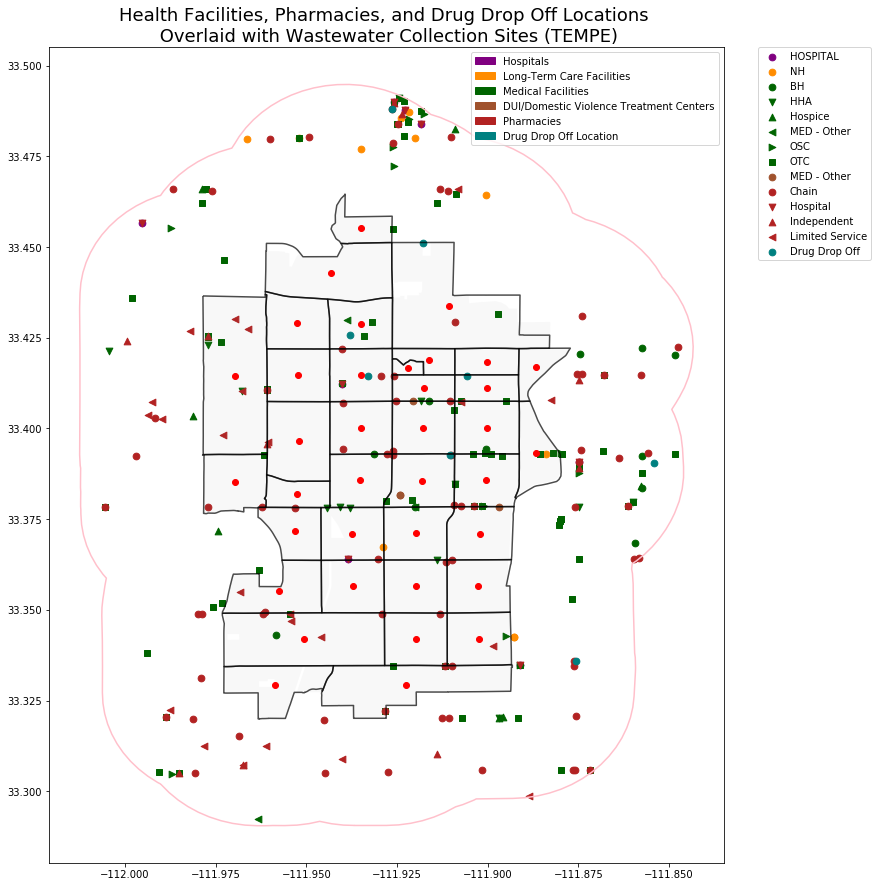

In [296]:
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Health Facilities, Pharmacies, and Drug Drop Off Locations \n Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)

for i in range(len(casesh)):
    hospitals_2mi[hospitals_2mi['Category']==casesh[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesh[i]),
                                             color='purple')

for i in range(len(casesl)):
    longterm_2mi[longterm_2mi['Category']==casesl[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesl[i]),
                                             color='darkorange')
                                             
for i in range(len(casesm)):
    med_2mi[med_2mi['Category']==casesm[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesm[i]),
                                             color='darkgreen')

    
for i in range(len(casesd)):
    dui_2mi[dui_2mi['Category']==casesd[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesd[i]),
                                             color='sienna')

for i in range(len(casesp)):
    pharm_2mi[pharm_2mi['Subtype']==casesp[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesp[i]),
                                             color='firebrick')

drug_2mi.plot(ax=ax,markersize=45, label="Drug Drop Off",color='teal')

leg1 = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#colors for color legend
h = mpatches.Patch(color='purple',label='Hospitals')
lt = mpatches.Patch(color='darkorange',label = 'Long-Term Care Facilities')
mf = mpatches.Patch(color='darkgreen',label = 'Medical Facilities')
dui = mpatches.Patch(color = 'sienna',label = 'DUI/Domestic Violence Treatment Centers')
p = mpatches.Patch(color='firebrick',label = 'Pharmacies')
dd = mpatches.Patch(color='teal',label = 'Drug Drop Off Location')
l2 = plt.legend(handles=[h,lt,mf,dui,p,dd],loc='upper right')

ax.add_artist(leg1)



bndryConvertedB.boundary.plot(ax=ax, color='pink')
bdry.plot(ax=ax, color='grey',alpha=0.05)
tempe.boundary.plot(ax=ax, color='black',alpha=0.7)
tempe.centroid.plot(ax=ax, color='red',label='Centroid')
plt.savefig('HealthFacilitiesPharmaciesDrugDropMap2mile.png')


In [ ]:
facilities